In [31]:
using Distributions
using Random
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [8]:
mean(rand(Exponential(0.5), 1000))

0.4844226336398801

In [53]:
pre_event_time = Exponential(1/0.2)
treatment_time = Exponential(1/0.2)
γ = 2.0
post_event_time = Exponential(pre_event_time.θ / γ)
N = 100

100

In [54]:
Xi = rand(treatment_time, N)

100-element Array{Float64,1}:
  0.96254800336177
 20.273569141416537
  5.627890771397752
  2.2887685616454685
  1.4440664866852984
  0.3334071409076055
  1.3928779524441828
  1.816262209830584
  4.478341205740915
  9.198387238351769
  1.3332903460086762
 10.848850982024347
 11.05228848121396
  ⋮
  3.9717406029613747
  3.87924295949869
  2.219394816030073
  1.8636454095123485
  6.0989492267530885
  2.224325011887539
  1.5664330487522578
  5.068301627340058
  1.9422805301457748
 12.385542766287681
  4.5023881322398465
  3.3808840577536445

In [55]:
is_T_greater_X = rand(N) .> cdf.(pre_event_time, Xi)

100-element BitArray{1}:
 1
 0
 0
 1
 1
 1
 0
 1
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 0
 1
 0
 0
 1
 0
 0
 1

In [56]:
T_less_X = rand(pre_event_time, N)

100-element Array{Float64,1}:
 11.043763117699196
  0.034970440585283265
  4.441826618522194
  1.3824982389568992
  2.4397035723504876
  6.183347716547375
 21.944135139281975
  8.510916049268763
  2.2045787474588825
  2.81520719789883
  0.4751293791827581
  5.470635381103907
  0.9676820780466144
  ⋮
  4.487201273841065
  3.773076484461169
  1.1208287544696727
 14.953870407195875
  4.290113964857845
  0.8469110128559767
  6.806871021920897
  1.7619294968310508
 16.29300127383916
  2.993109058750207
  0.7849680594771782
  0.36802418403400805

In [57]:
T_ge_X = rand(post_event_time, N)

100-element Array{Float64,1}:
 0.5643490654105796
 1.0585147605415528
 0.2514674756858986
 1.3601830353351465
 1.6138035322356097
 0.006020450873924612
 1.5422280004067204
 1.4554017993641486
 2.626008984213594
 1.1473746657000174
 3.364786685356212
 7.05444671333238
 0.11308082389965306
 ⋮
 0.02494744059419388
 0.6115607171068144
 0.8275055697529561
 0.7920898003734005
 0.26292226473891506
 0.43308072509396023
 0.5737822422523726
 2.3144084794389324
 2.601091044692192
 1.6011302713193087
 8.179011867398716
 0.4291858527128814

In [58]:
Ti = T_less_X .* (.!is_T_greater_X) .+ (Xi .+ T_ge_X) .* is_T_greater_X

100-element Array{Float64,1}:
  1.5268970687723495
  0.034970440585283265
  4.441826618522194
  3.648951596980615
  3.057870018920908
  0.3394275917815301
 21.944135139281975
  3.2716640091947324
  2.2045787474588825
  2.81520719789883
  0.4751293791827581
  5.470635381103907
  0.9676820780466144
  ⋮
  3.9966880435555687
  4.490803676605505
  3.0469003857830295
  2.6557352098857487
  4.290113964857845
  2.657405736981499
  6.806871021920897
  1.7619294968310508
  4.543371574837967
  2.993109058750207
  0.7849680594771782
  3.810069910466526

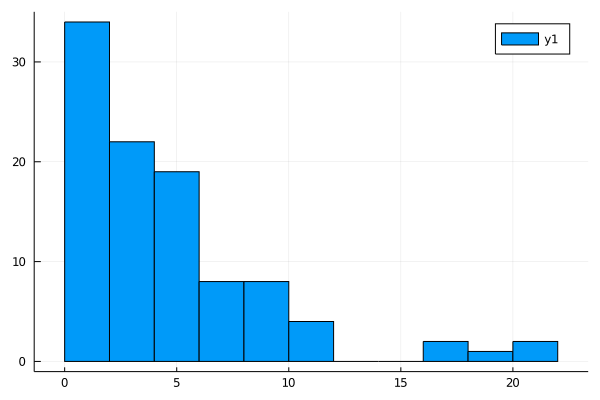

In [59]:
histogram(Ti)

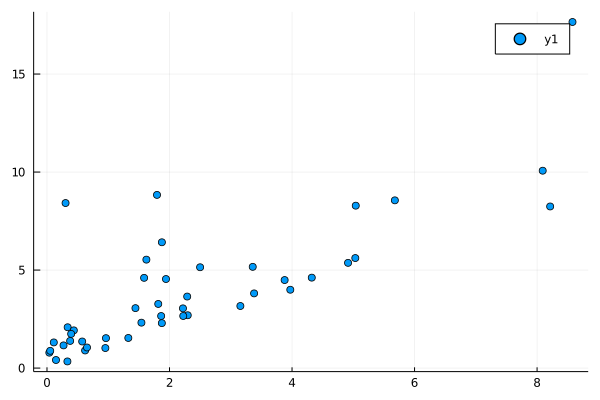

In [60]:
scatter(Xi[is_T_greater_X], Ti[is_T_greater_X])

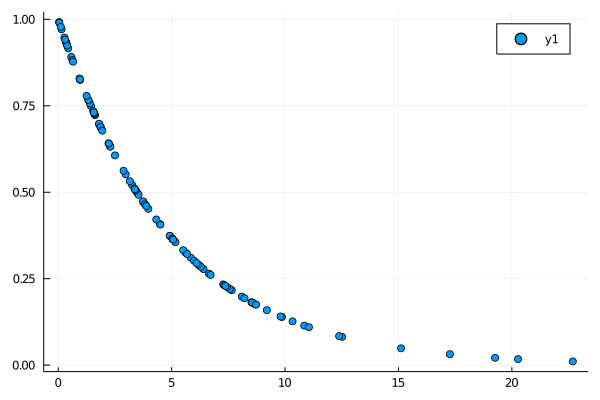

In [63]:
scatter(Xi, 1 .- cdf.(pre_event_time, Xi))

In [67]:
function mle_exponential(data)
    return 1 ./ mean(data)
end

mle_exponential (generic function with 1 method)

In [68]:
mle_exponential(Ti[is_T_greater_X] .- Xi[is_T_greater_X])

0.6149751377984936

In [69]:
mle_exponential(Ti)

0.22316784078442548

In [73]:
function fe_exponential(T, X, g::Real)
    Y = T .* (.!is_T_greater_X) .+ (g * T .+ (1-g) * X) .* (is_T_greater_X)
    return 1 ./ Y
end

fe_exponential (generic function with 1 method)

In [80]:
λi = fe_exponential(Ti, Xi, 100)

100-element Array{Float64,1}:
  0.01742237539865297
 28.595579102335748
  0.22513260554341544
  0.007230288262569573
  0.006141584915699669
  1.0690016761382095
  0.04557026256231489
  0.006786265910298919
  0.4536013971615459
  0.35521364137828443
  2.1046898882995633
  0.18279412359560548
  1.0333972517281949
  ⋮
  0.15464352769868475
  0.01537626142152762
  0.011768866274702142
  0.012334619663397422
  0.233094040902276
  0.021962384026287248
  0.1469103787598726
  0.5675595997448067
  0.0038160454675804254
  0.3341007562275585
  1.2739371849932877
  0.02159851969129892

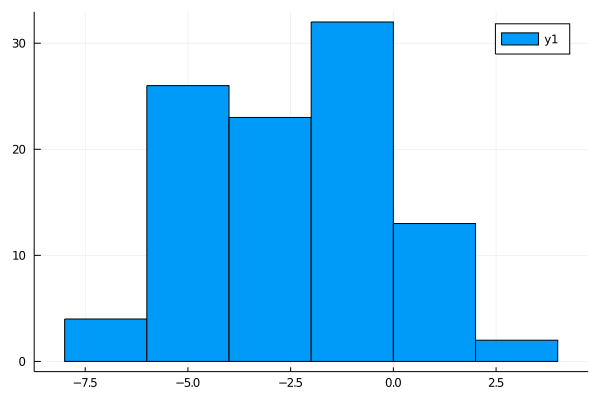

In [81]:
histogram(log.(λi))